In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')


samples = samples_published + samples_new

def plot_fault_block(names,save=False,filename=None):
    smps = [smp for smp in samples if smp.name in names]
    
    nplots = len(names)
    height = nplots*1.5
    
    fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height))
    
    if len(names)==1:
        smp = smps[0]
        smp.kde(ax=axs)
        axs.set_title(smp.name)
        axs.set_xlim(100,4000)
    
    else:
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k])
            axs[k].set_title(smp.name)
            axs[k].set_xlim(100,4000)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

all_called = []

['N3', 'N2', 'N1', 'CT130918-2A']
0.010710455976998066 0.2498814114252413 0.042862155755840944
0.004684831567322022 0.2577302644656253 0.018177265976254256
0.008707549944096872 0.18519037013324588 0.04701945321364023
0.013166727398026238 0.22213454574539945 0.05927365936641545


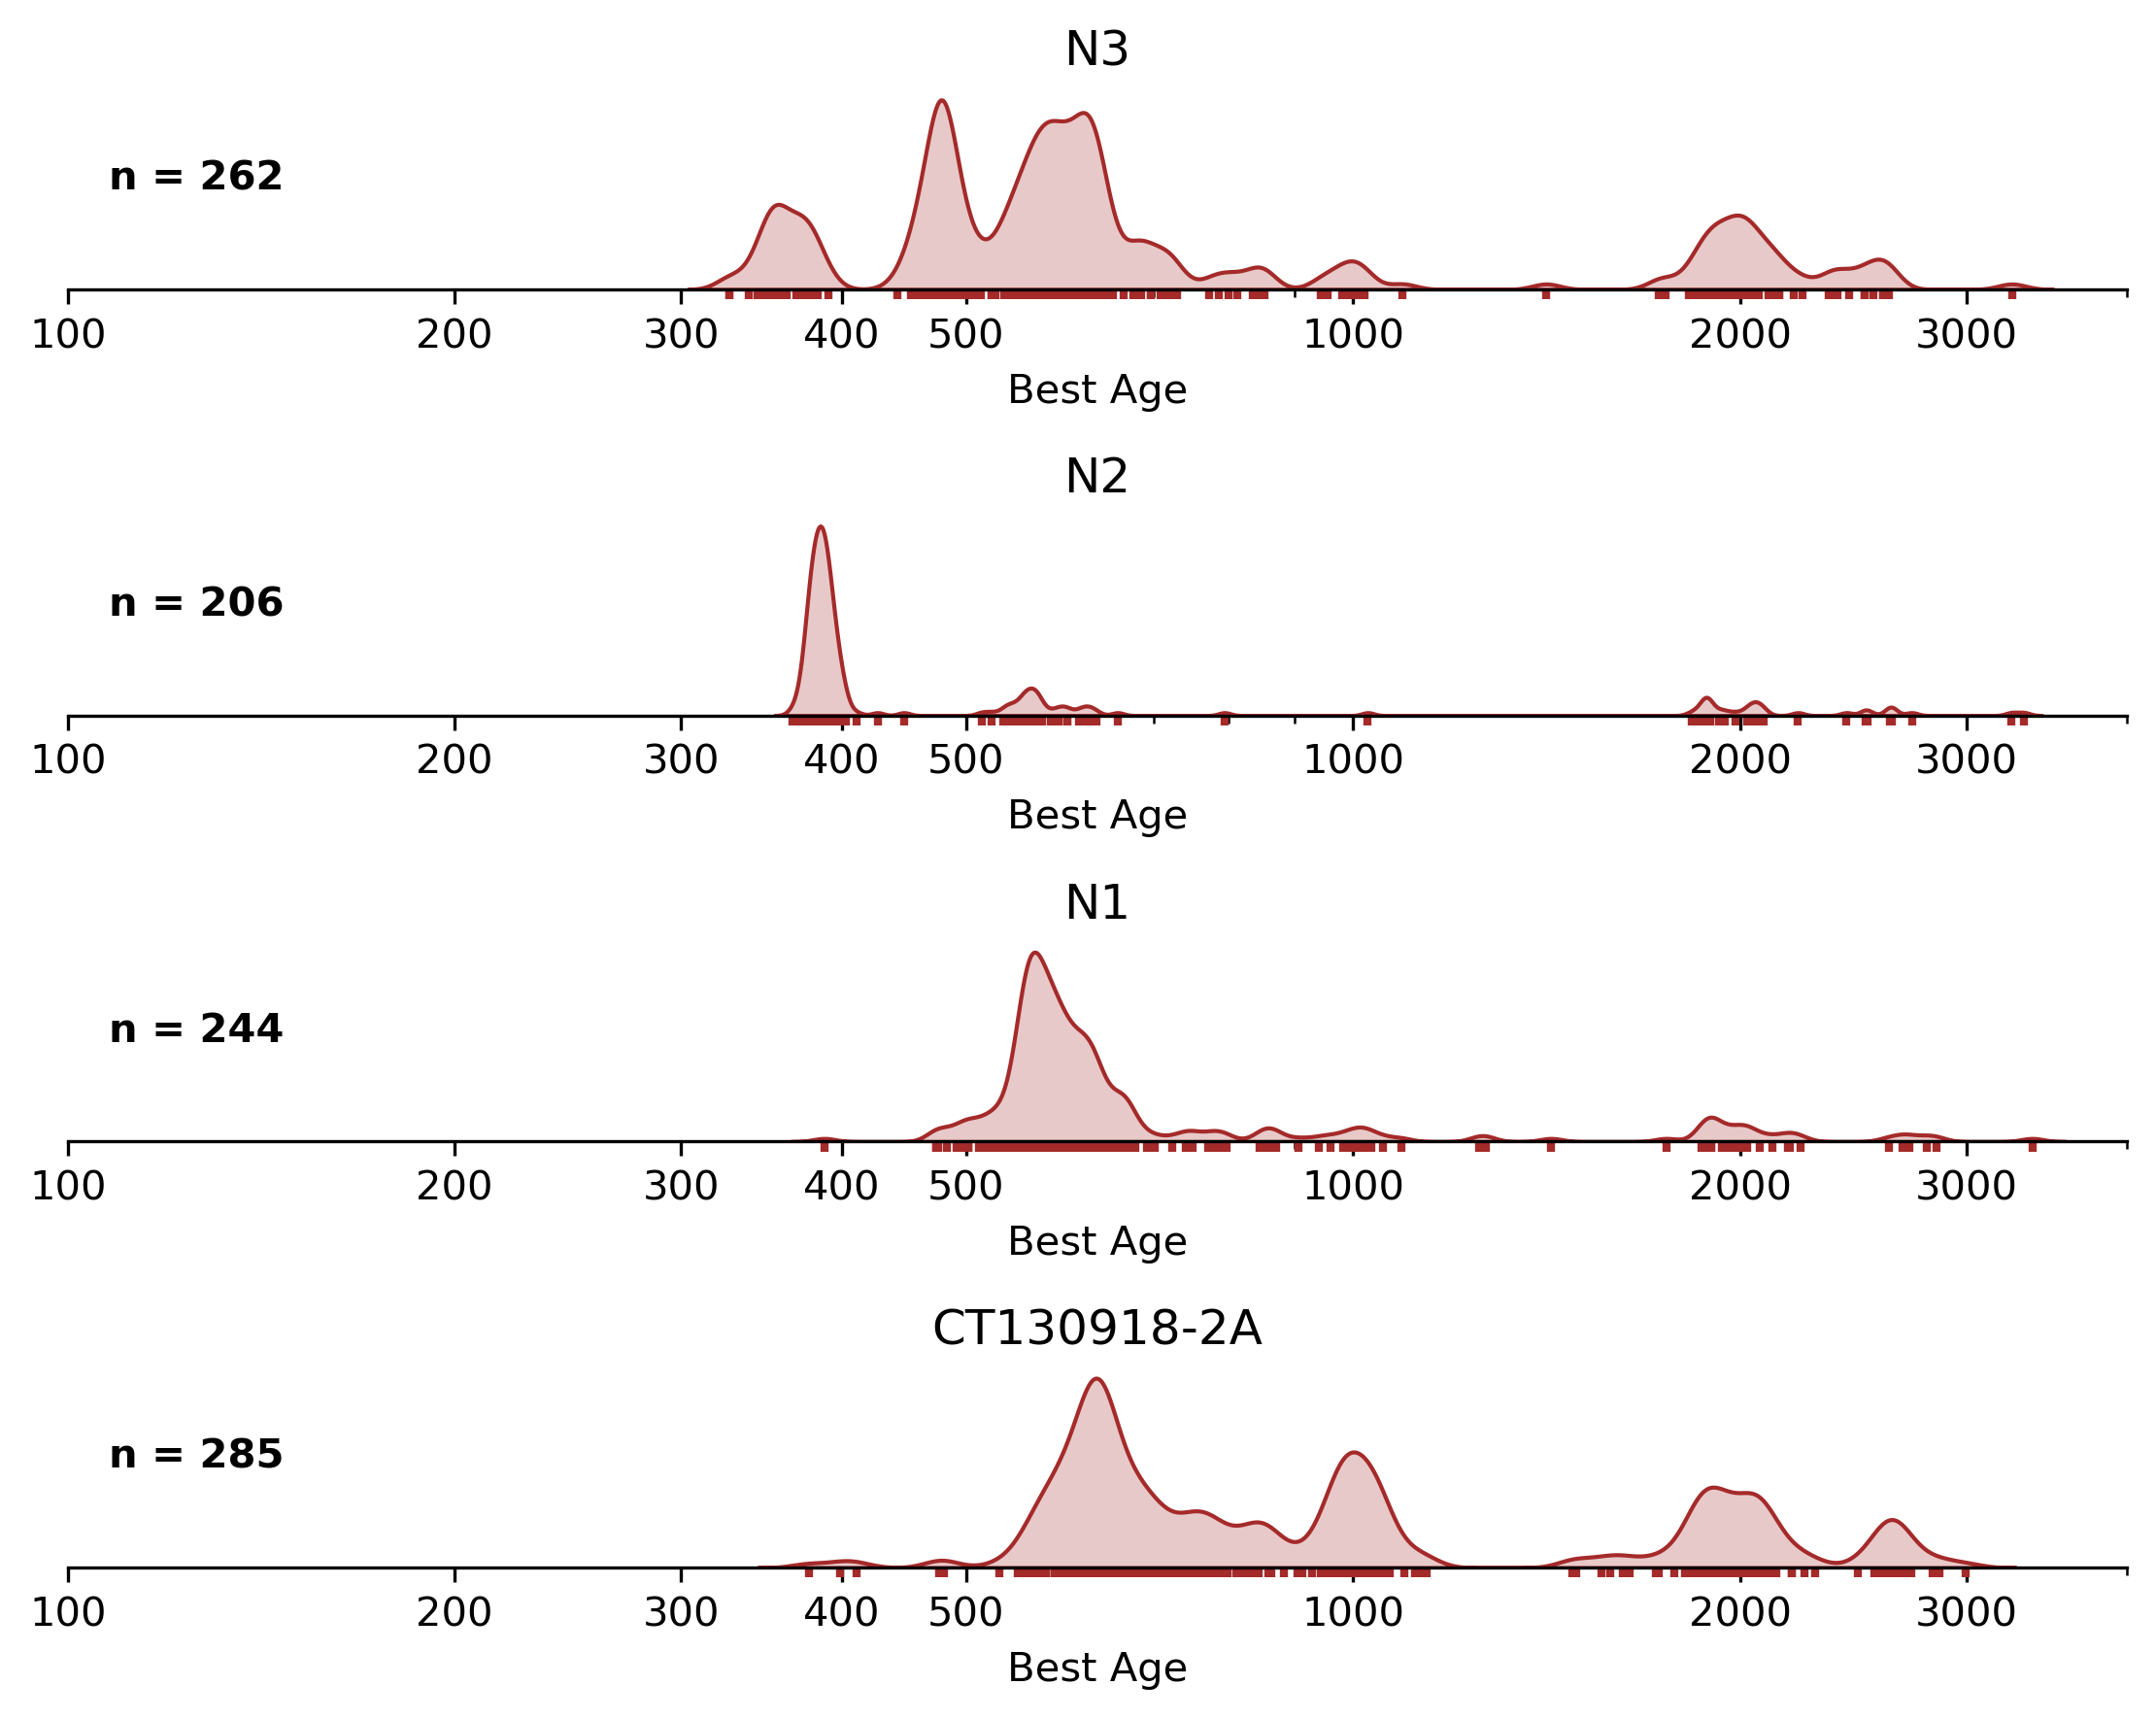

In [2]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg > 320) & (n > 15) & ~modern:
        sample.color = 'brown'
        smps.append(sample.name)

print(smps)

plot_fault_block(smps,save=True,filename='Pz.pdf')

all_called = all_called + smps

['NW-GC', 'N5', '100211-9A', 'CT130918-9A']
0.04132744350379808 0.15761674655850663 0.2622021099037057
0.022324422577724448 0.29230370030092545 0.07637406763835541
0.01409003542429721 0.29088848671237033 0.04843792748053791
0.011901380538612415 0.2624253740711965 0.04535148546795459


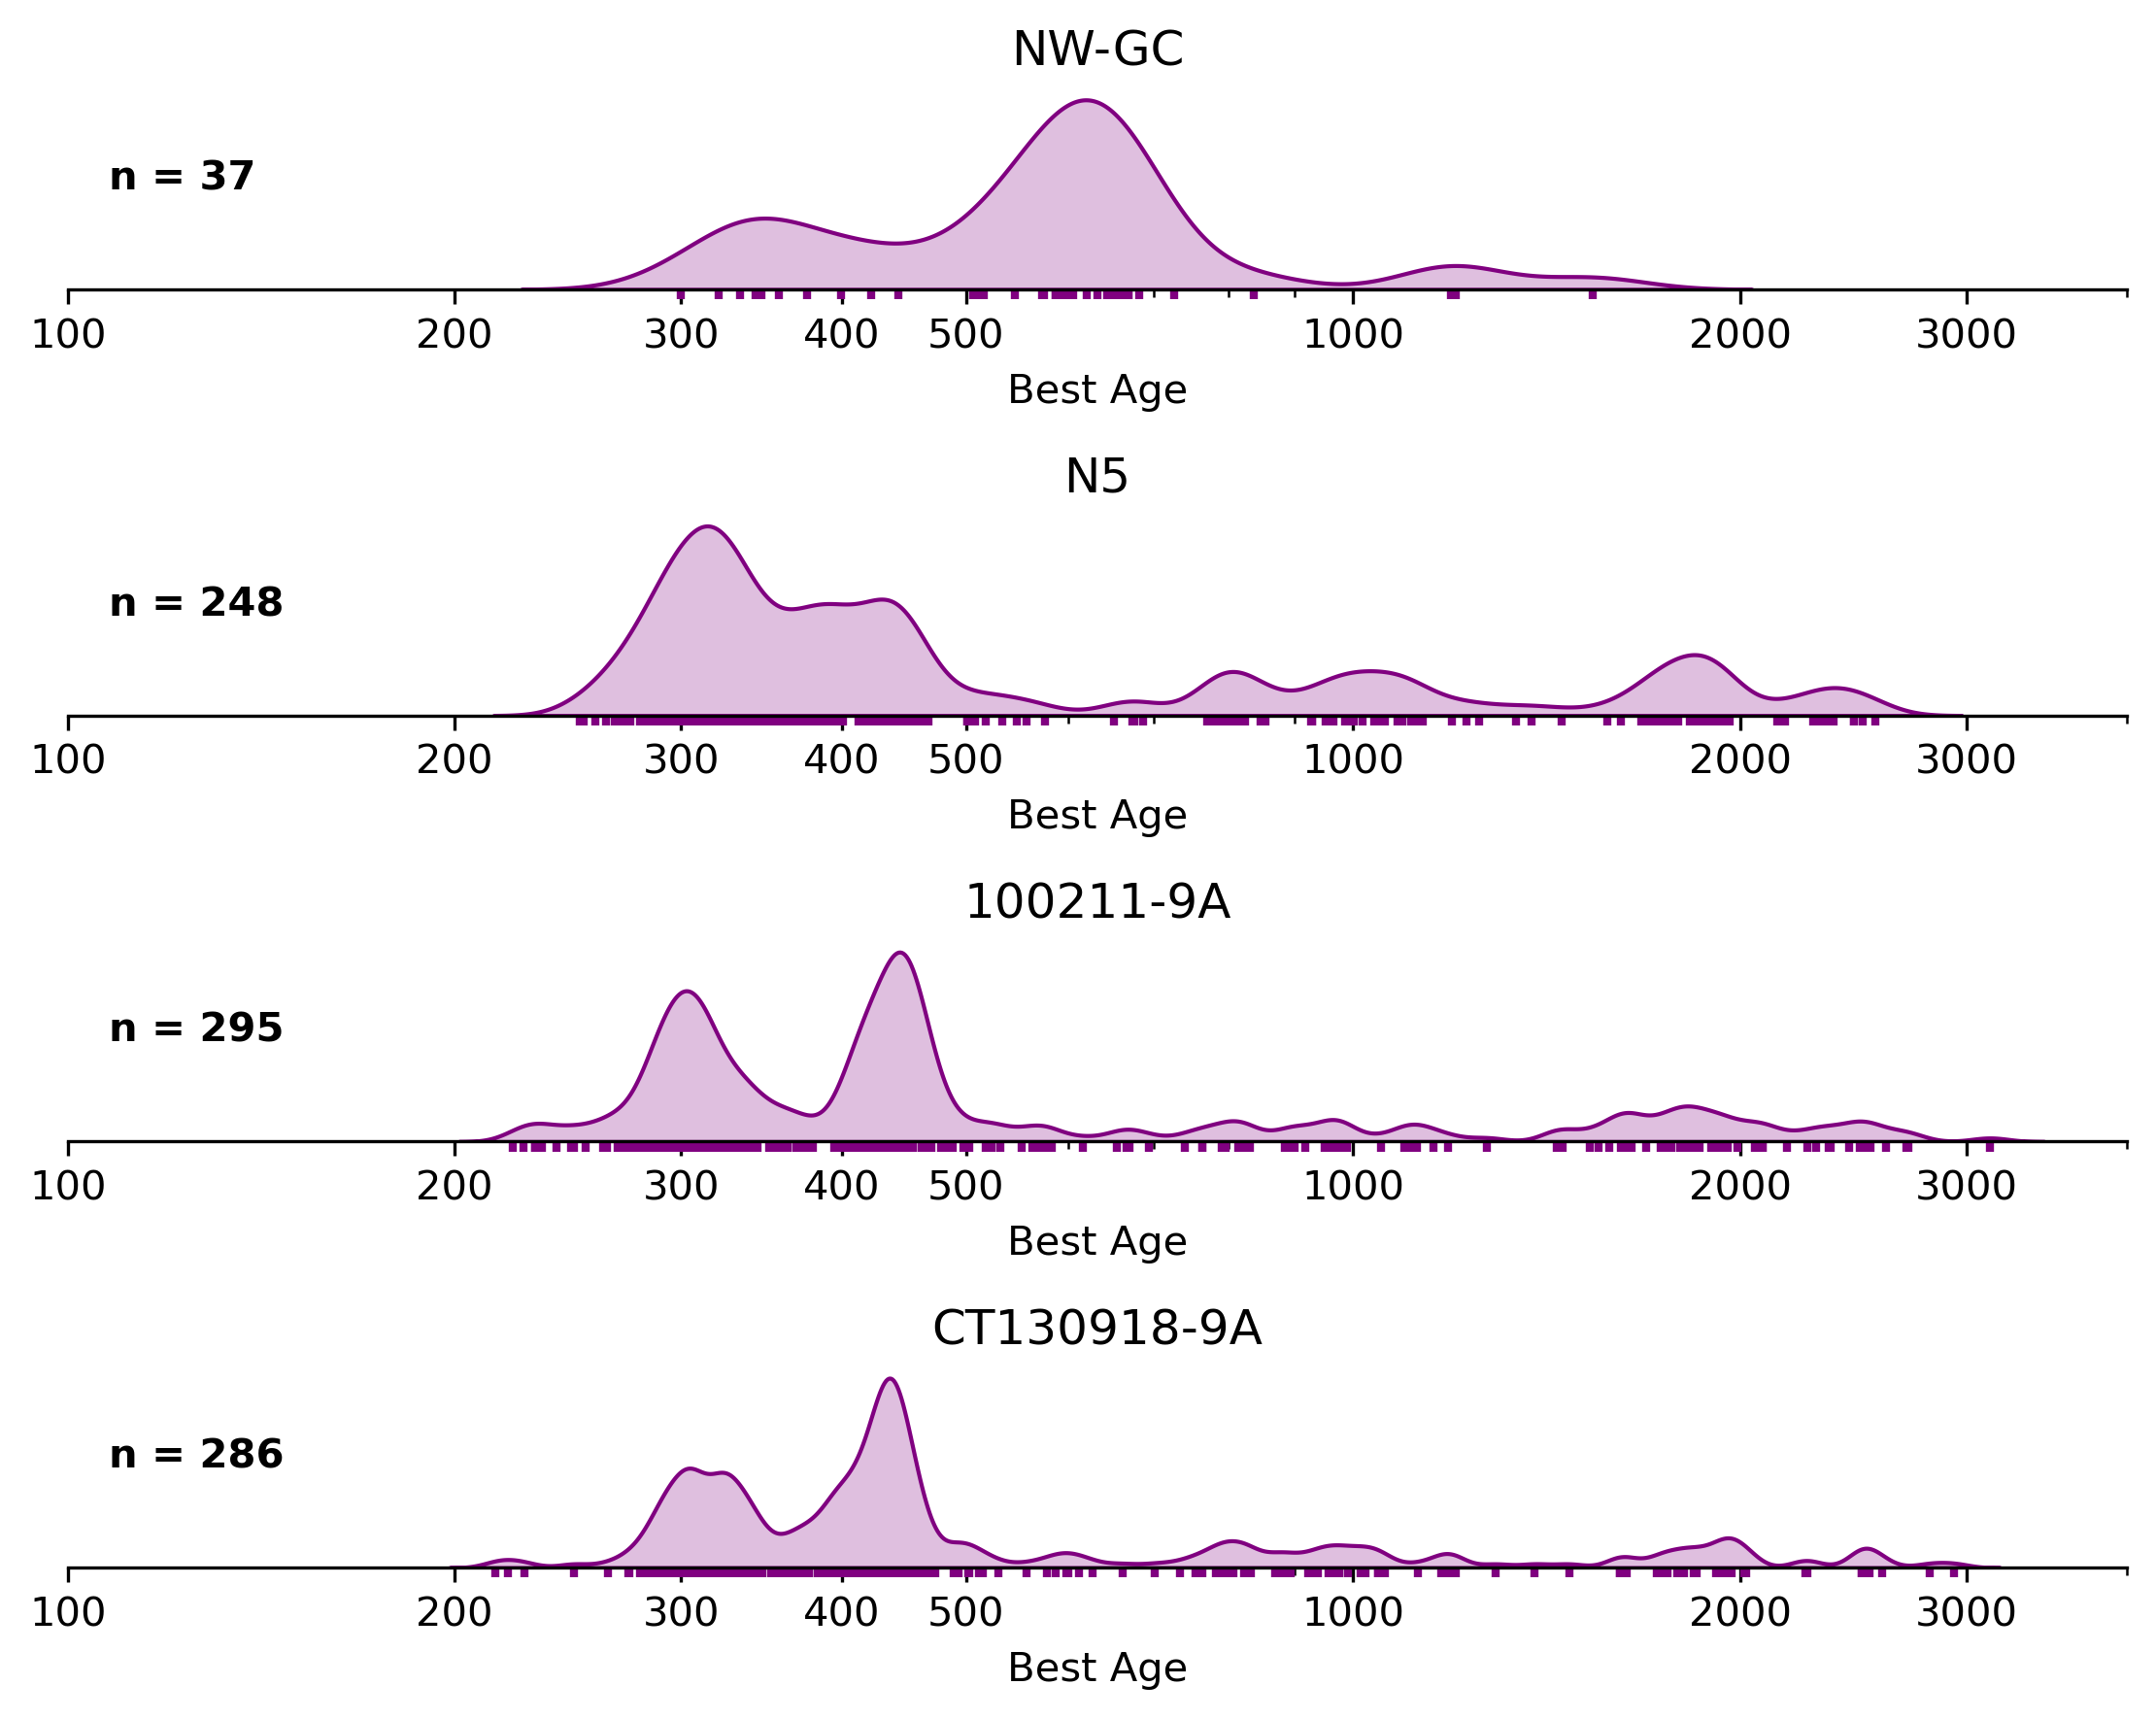

In [3]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg < 320) & (ysg > 200) & (n > 15) & ~modern & ~('K' in sample.name) & ~('N4' in sample.name):
        sample.color = 'purple'
        smps.append(sample.name)

print(smps)

plot_fault_block(smps,save=True,filename='PTr.pdf')

all_called = all_called + smps

196.6 (Jurassic)
Tithonian
Bajocian
J2
J2
J1
J1
['K3', 'NE-GC', 'GC41', 'CT15076', '100411-5', 'CT130919-5A', 'AB0913']
0.008312171378389136 0.22821825645948568 0.03642202647299932
0.03722713809884561 0.2967852737526894 0.125434586521523
0.00426798171263129 0.2237850274394075 0.01907179296786018
0.020346693232609302 0.26057367365989165 0.0780842244990812
0.016832287360217503 0.2404039770255268 0.07001667596551533
0.19131375143596321 0.3570221665150167 0.5358595890653651
0.01482761552415856 0.2969196378512206 0.04993814363867817
0.004569469422224945 0.1749492271818807 0.026118831708095706
0.021019108932851003 0.38150504561965337 0.055095231830318406


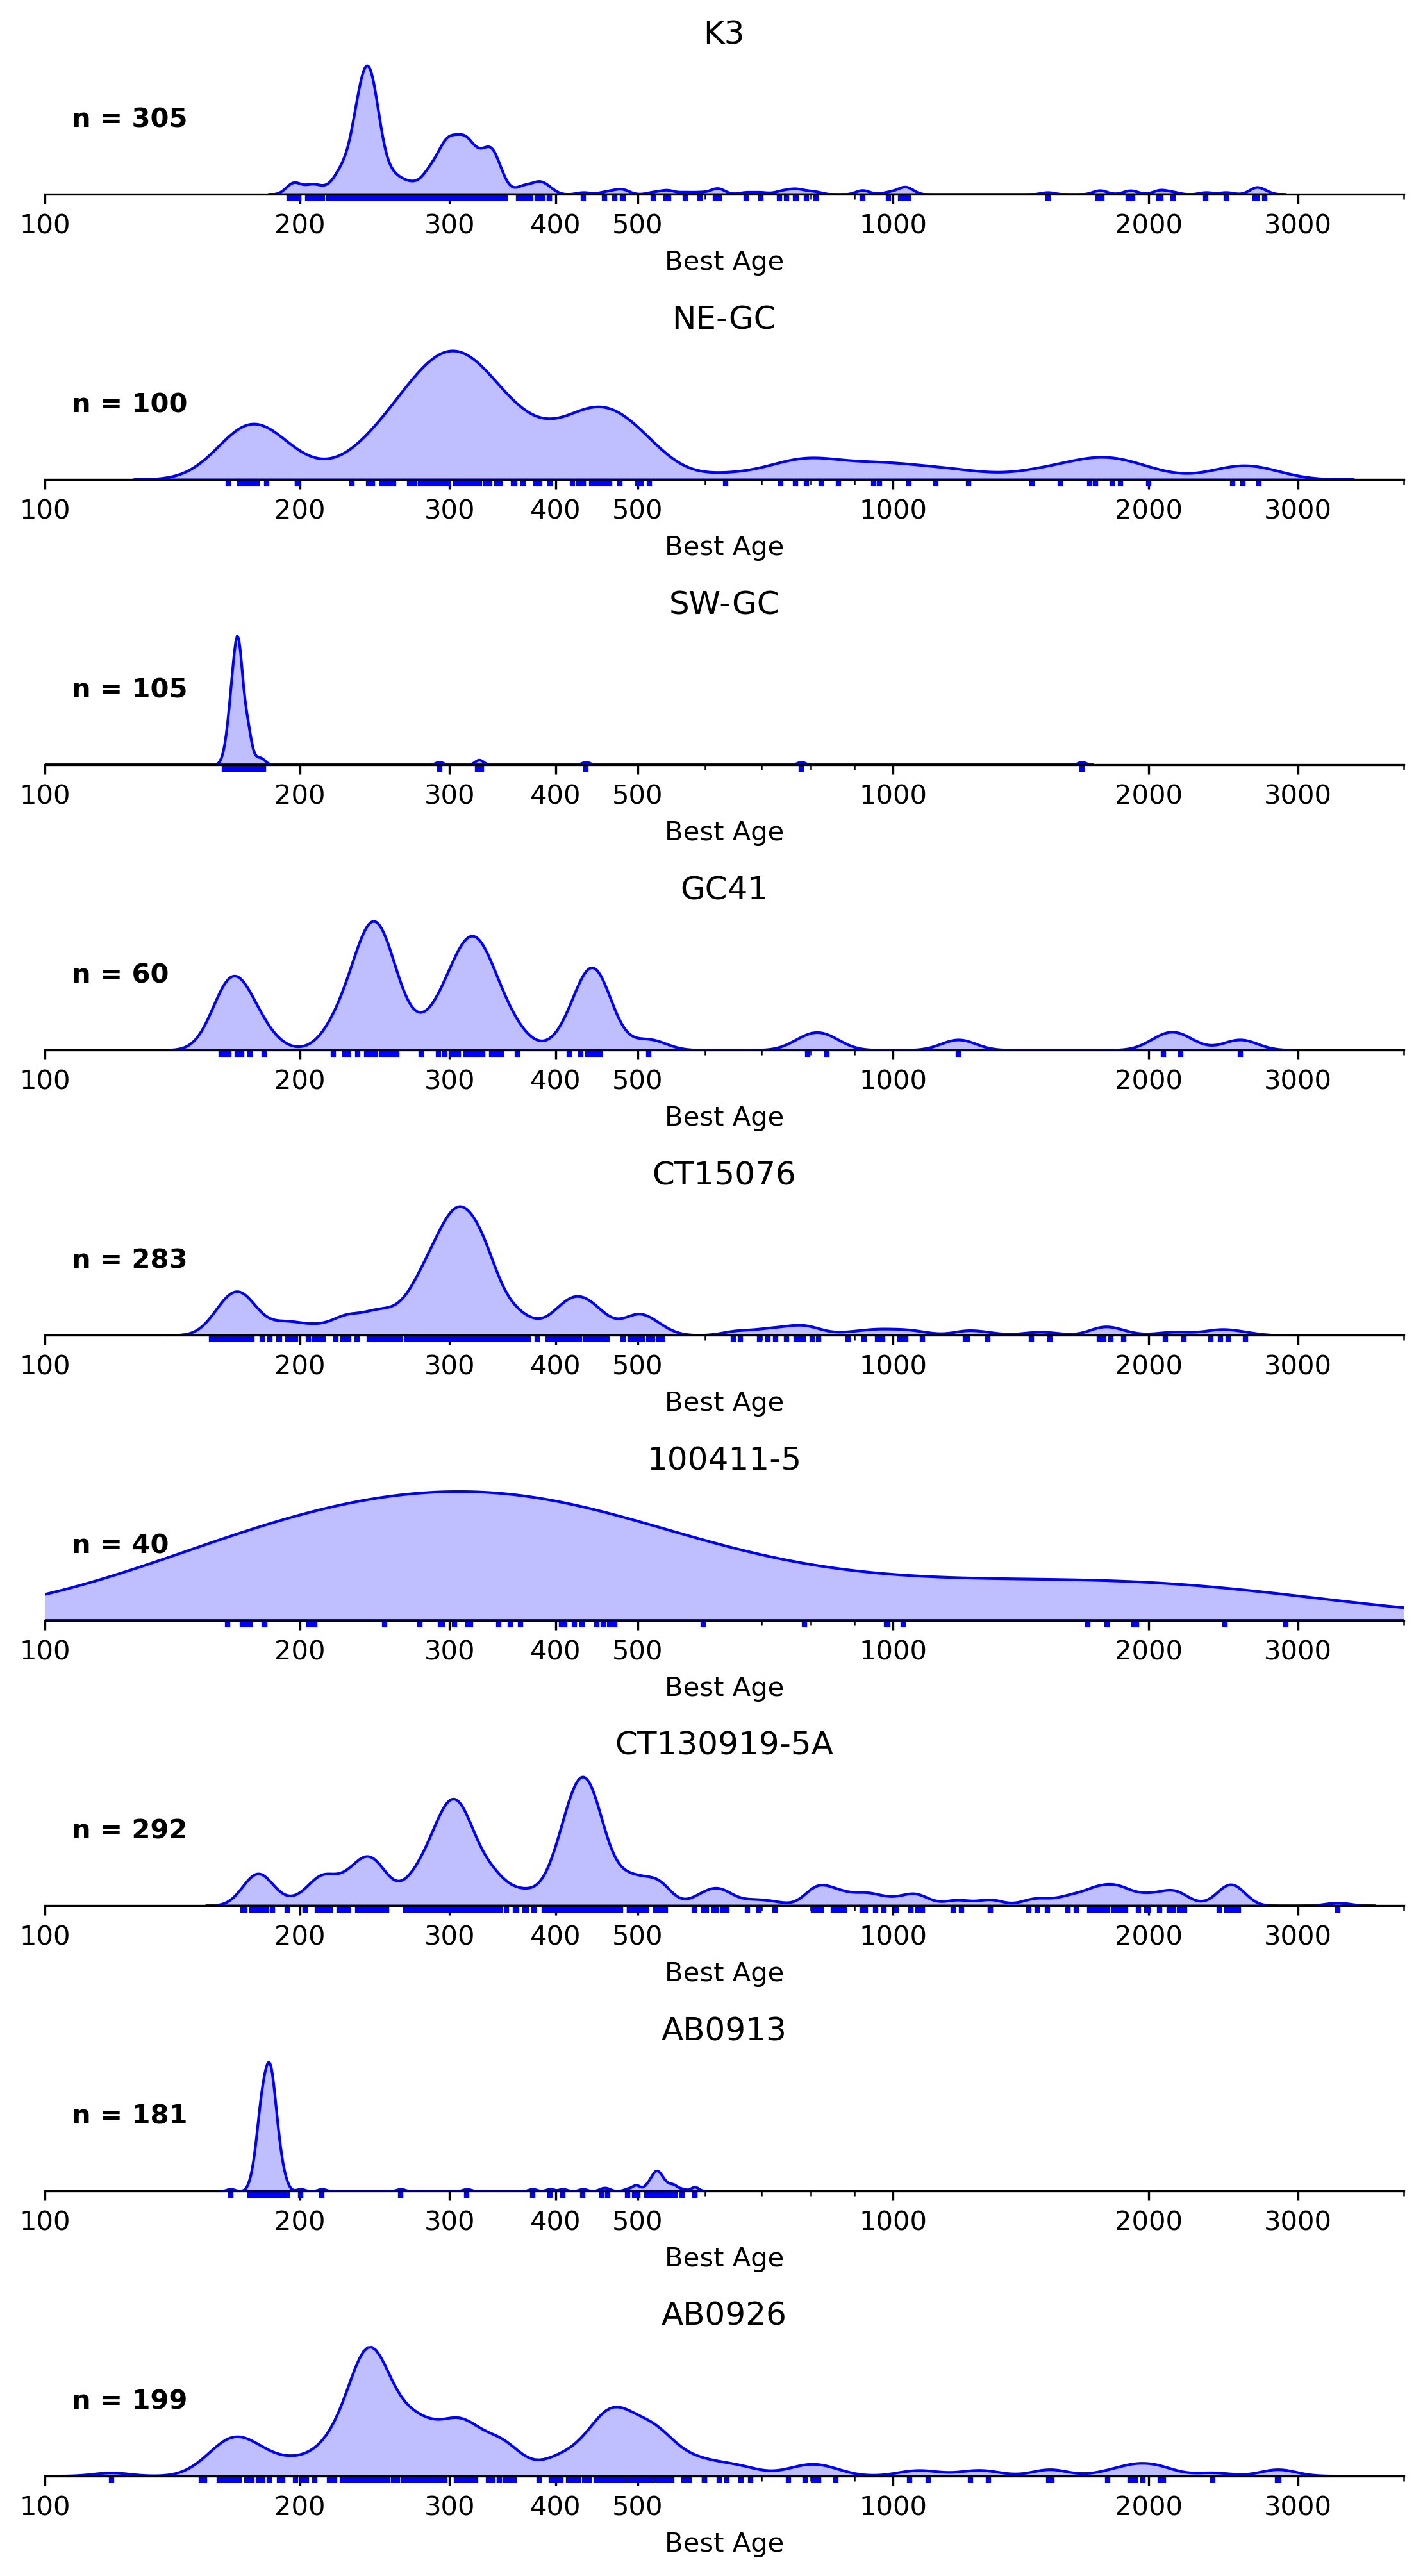

In [4]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if ((ysg < 200) & (ysg > 140) & (n > 15) & ~modern & ~('W' in sample.name)):
        sample.color = 'blue'
        smps.append(sample.name)
        print(sample.reported_age)

print(smps)

plot_fault_block(smps + ['AB0926','SW-GC'], save=True,filename='J.pdf')

all_called = all_called + smps + ['AB0926','SW-GC']

Cenomanian
K1
K1
K2
['SE-GC', '100211-1A', 'CT15092', 'CT15113']
0.008732245297702312 0.0416745500784637 0.20953424287152422
0.032728464183196665 0.3867529948344862 0.08462368648807245
0.013934299057858921 0.2224493232868302 0.06264033017484968
0.07709783143624628 0.28747024063730686 0.26819413120928387


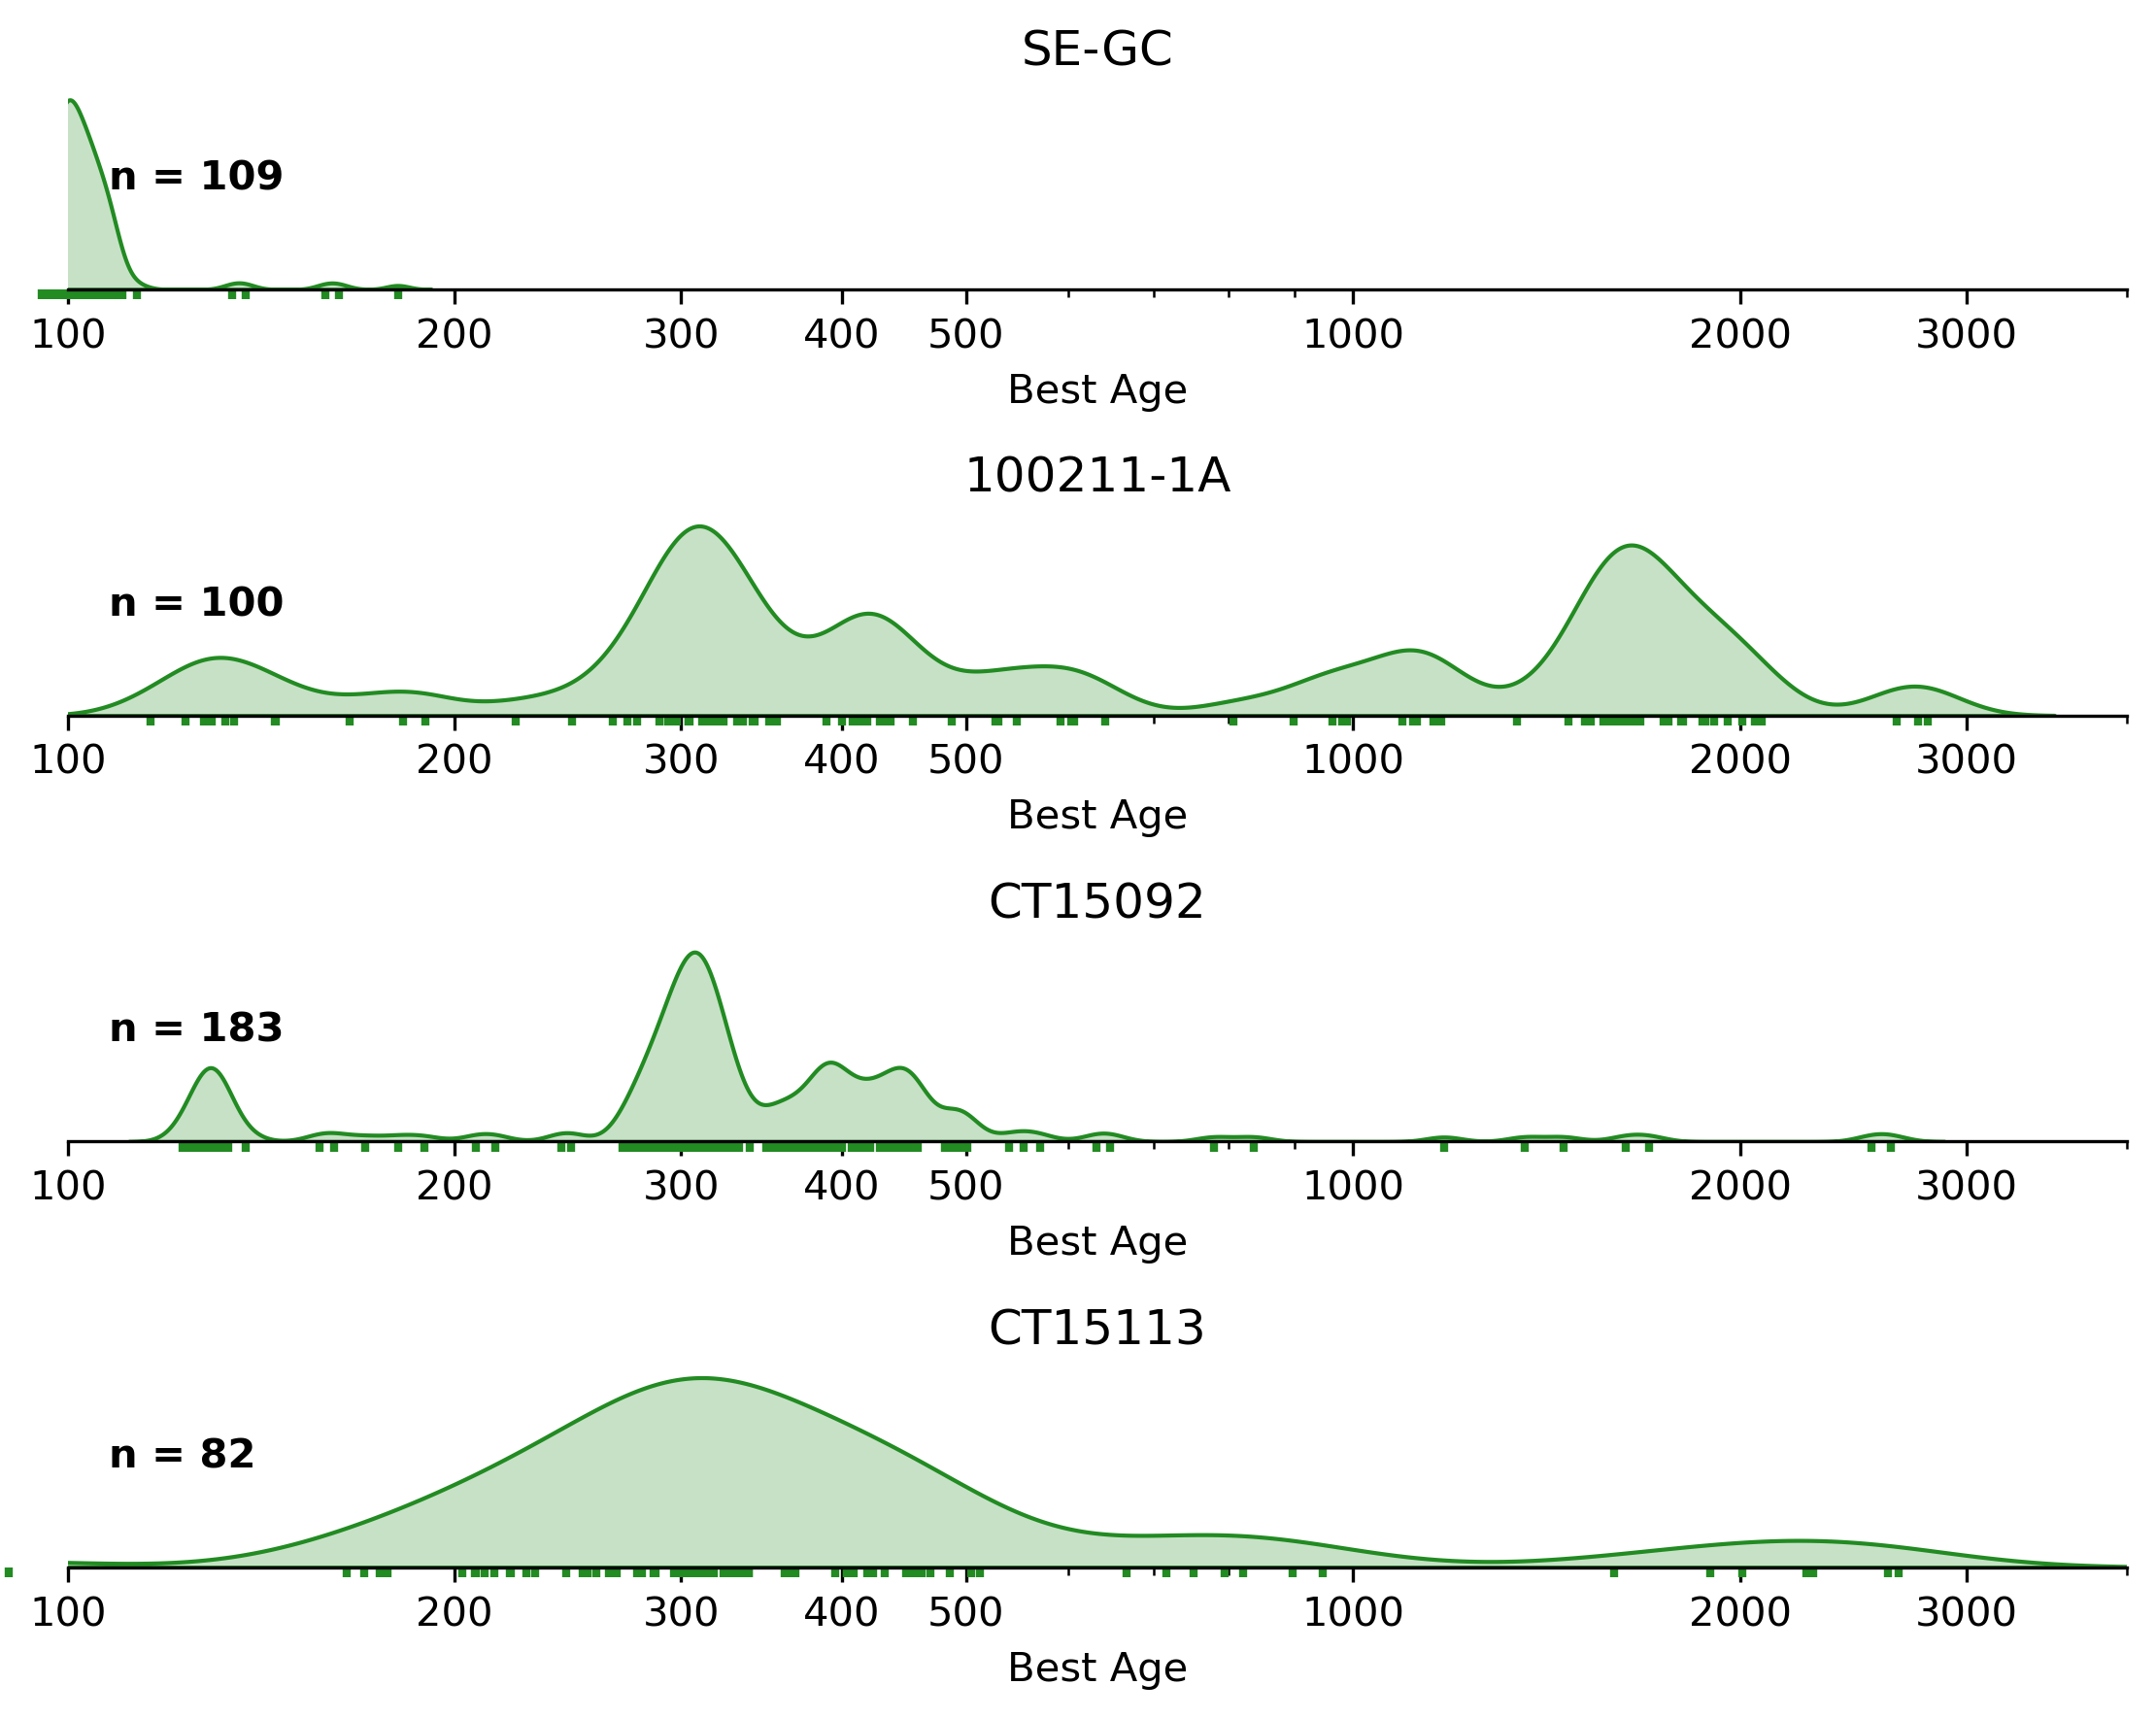

In [5]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg < 140) & (ysg > 60) & (n > 15) & ~modern & ~('F' in sample.name) & ~('W' in sample.name) & ~('ILN' in sample.name):
        sample.color = 'forestgreen'
        smps.append(sample.name)
        print(sample.reported_age)

print(smps)

plot_fault_block(smps,save=True,filename='K.pdf')

all_called = all_called + smps

NW-GC purple collisional
N3 brown collisional
N2 brown convergent
N1 brown collisional
SE-GC forestgreen convergent
K3 blue convergent
N5 purple convergent
NE-GC blue collisional
SW-GC blue collisional
GC41 blue convergent
CT15076 blue collisional
100211-1A forestgreen collisional
100411-5 blue collisional
CT15092 forestgreen collisional
CT130918-2A brown extensional
100211-9A purple collisional
CT130918-9A purple collisional
CT130919-5A blue collisional
AB0913 blue convergent
AB0926 blue extensional
CT15113 forestgreen collisional


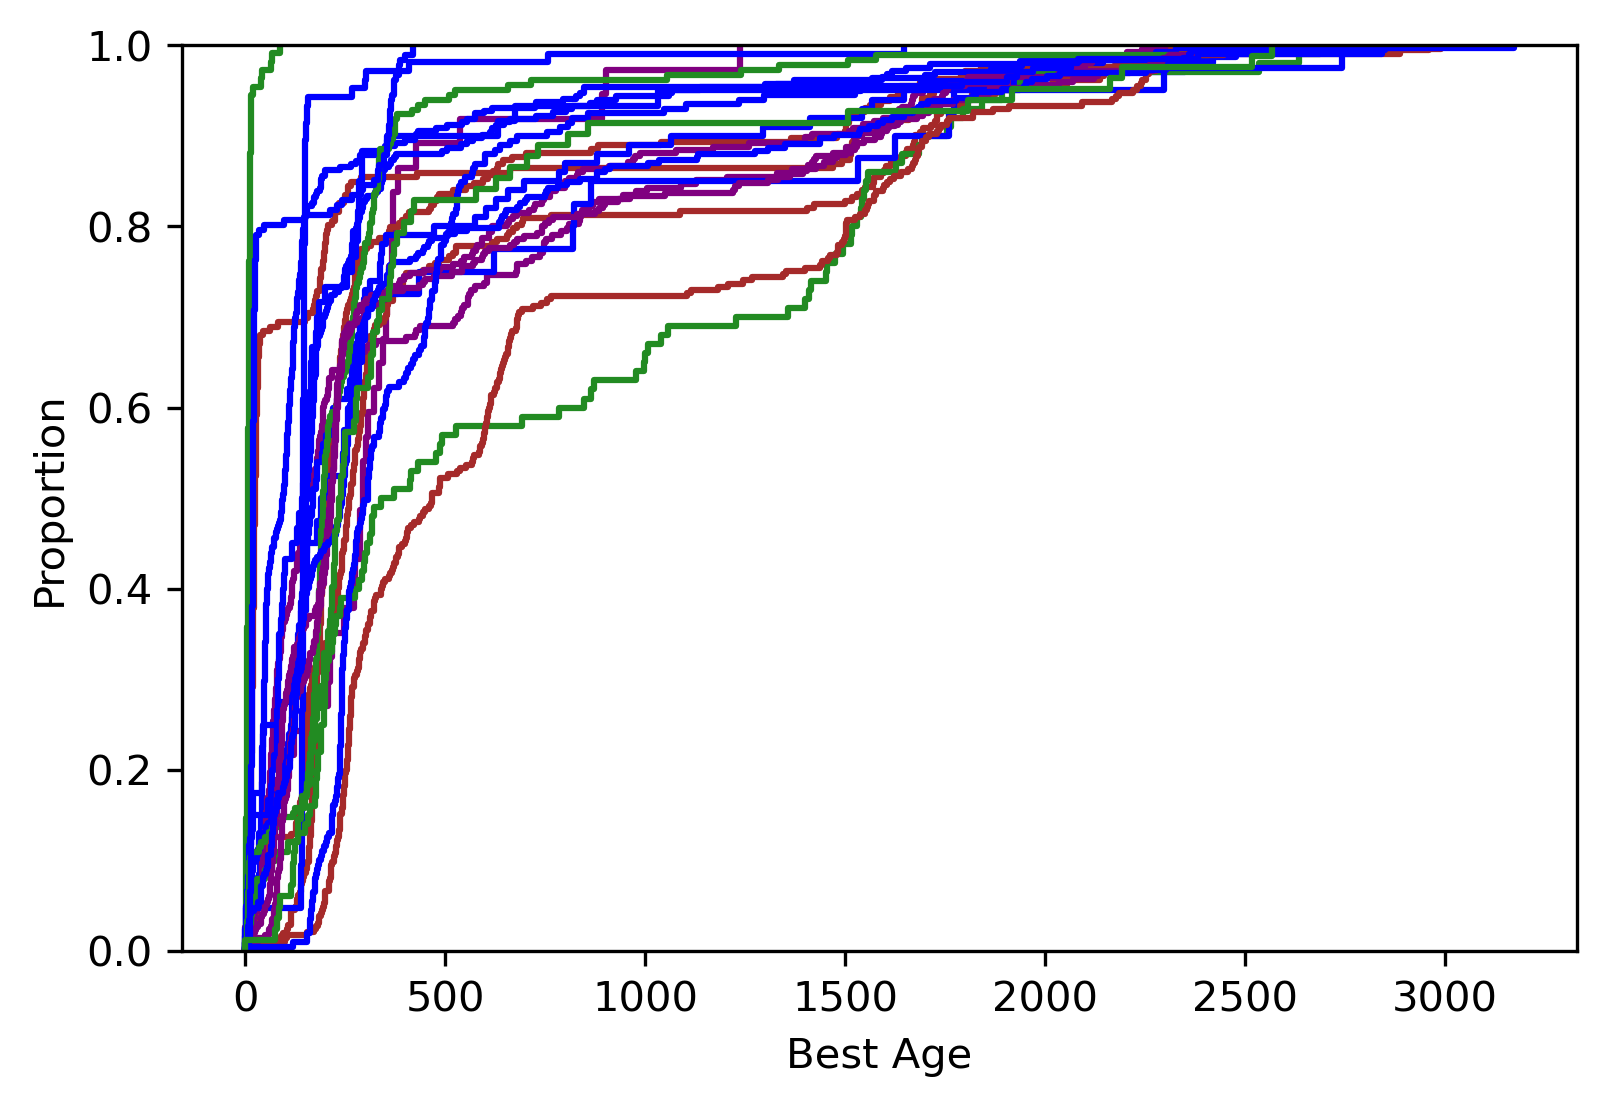

In [17]:
smps_all = [smp for smp in samples if smp.name in all_called]

fig,axs = plt.subplots(1,dpi=300)

for sample in smps_all:
    sample.cawood_classify()
    sample.cad(ax=axs,color=sample.color,depage='youngest')
    print(sample.name,sample.color,sample.cawood)
